### Some Plots for survival analysis -different likelihoods 

In [84]:
import numpy as np
import scipy 
from scipy.stats import fisk, weibull_min, lognorm

In [85]:
import matplotlib
import matplotlib.pyplot as plt 

In [86]:
print(scipy.__version__)

0.18.1


In [87]:
fig1, (ax1, ax2) = plt.subplots(1,2)

In [88]:
c = [0.7, 0.9, 0.99, 1.4, 2, 2.5]
c2 = [0.5, 0.7, 0.9, 1.6]

In [89]:
r = 3.10

In [90]:
rvs = [fisk(i) for i in c2]

In [91]:
# rvs2 = lambda x:fisk(x)

In [92]:
x = np.linspace(fisk.ppf(0.01, r),fisk.ppf(0.99, r), 200)
# x = np.linspace(0.1, 4.1, 200)

In [93]:
cols = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

In [94]:
for i,rv in enumerate(rvs):
    colstr = str(cols[i])+'-'
    ax1.plot(x, rv.pdf(x), colstr, lw=3, alpha=0.7)
    ax2.plot(x, rv.cdf(x), colstr, lw=3, alpha=0.7)

In [95]:
mean, var, skew, kurt = weibull_min.stats(r, moments='mvsk')

In [96]:
weibull_min.ppf(0.99, r)

1.6366289187469731

In [97]:
r_ref= 1.9
weibull_min.ppf(0.01, r_ref),weibull_min.ppf(0.99, r_ref)
x1 = np.linspace(weibull_min.ppf(0.0005, r_ref),weibull_min.ppf(0.9999, r_ref), 200)
# x1 = np.linspace(0.1,4.1, 200)

In [98]:
rvs_weibull = [weibull_min(i) for i in c2]

In [99]:
fig2, (ax3, ax4) = plt.subplots(1,2)

In [100]:
for i,rv_w in enumerate(rvs_weibull):
    colstr = str(cols[i])+'-'
    ax3.plot(x1, rv_w.pdf(x1), colstr, lw=3, alpha=0.7)
    ax4.plot(x1, rv_w.cdf(x1), colstr, lw=3, alpha=0.7)

In [101]:
s = 0.92
x_min = lognorm.ppf(0.01, s)
x_max = lognorm.ppf(0.95, s)
print(x_min), print(x_max)
x2 = np.linspace(x_min, x_max, 100)

0.117626604058
4.54153625419


In [102]:
rvs_lognormal = [lognorm(i) for i in c2]

In [103]:
fig3, (ax5, ax6) = plt.subplots(1,2)

In [104]:
for i, rv_ln in enumerate(rvs_lognormal):
    colstr = str(cols[i])+'-'
    ax5.plot(x2, rv_ln.pdf(x2), colstr, lw=3, alpha=0.7)
    ax6.plot(x2, rv_ln.cdf(x2), colstr, lw=3, alpha=0.7)

In [105]:
ax1.set_title('loglogistic-pdf- shape')
ax2.set_title('loglogistic-cdf- shape')
ax3.set_title('weibull-pdf shape')
ax4.set_title('weibull-cdf shape')
ax5.set_title('lognormal-pdf shape')
ax6.set_title('lognormal-cdf shape')

In [106]:
# plt.show()

In [107]:
fig22,  ax22 = plt.subplots(1,1)

In [108]:
r_l2 = 1.8

In [109]:
# rvs1 = fisk.rvs(r_l1, size=1000)
rvs2 = fisk.rvs(r_l2, size=1000)

In [110]:
# ax21.hist(rvs1, normed=True, histtype='stepfilled', alpha=0.2)
# ax21.legend(loc='best', frameon=False)

In [111]:
ax22.hist(rvs2, normed=True, histtype='stepfilled', alpha=0.2)
ax22.legend(loc='best', frameon=False)

/u/26/dhakaa1/unix/anaconda2/envs/py34/lib/python3.4/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Plot of pdf, Hazard function and Survival function for fixed value of shape parameter 

In [112]:
r_w, r_ll = 0.5, 1.5

In [113]:
r_ref= 2.1
fisk.ppf(0.005, r_ref),fisk.ppf(0.95, r_ref)

(0.080409629094868929, 4.0637809129300857)

In [114]:
x2 = np.linspace(fisk.ppf(0.01, r_ref),fisk.ppf(0.99, r_ref), 200)

In [115]:
rv_ll = fisk(r_ll) 

In [116]:
fig33,(ax31, ax32, ax33) = plt.subplots(1,3)

In [117]:
# Loglogistic
ax31.plot(x2, rv_ll.pdf(x2), 'b-', lw=2.5, alpha=0.6, label='pdf')
ax31.plot(x2, 1 - rv_ll.cdf(x2), 'g-', lw=2.5, alpha=0.6, label='survival')
ax31.plot(x2, rv_ll.pdf(x2) / (1 - rv_ll.cdf(x2)), 'r-', lw=2.5, alpha=0.6,label='hazard')
legend31 = ax31.legend(loc='upper right')
ax31.set_title('survival, hazard functions for loglogistic likelihood')
ax31.set_xbound(0,8)

In [118]:
r_ref= 1.2
weibull_min.ppf(0.0005, r_ref), weibull_min.ppf(0.9999, r_ref)

(0.0017751381888665037, 6.3615517830705368)

In [119]:
x3 = np.linspace(weibull_min.ppf(0.01, r_ref),weibull_min.ppf(0.9999, r_ref), 300)
rv_we = weibull_min(r_w) 

In [120]:
# weibull
ax32.plot(x3, rv_we.pdf(x3), 'b-', lw=1.6, alpha=0.6, label='pdf')
ax32.plot(x3, 1 - rv_we.cdf(x3), 'g-', lw=1.6, alpha=0.6, label='survival')
ax32.plot(x3, rv_we.pdf(x3) / (1 - rv_we.cdf(x3)), 'r-', lw=1.6, alpha=0.6, label='hazard')
legend32 = ax32.legend(loc='upper right')
ax32.set_xbound(0,8)
ax32.set_title('survivial, hazard and failure density functions for weibull likelihood')

ax33.plot(x3, rv_ln.pdf(x3), 'b-', lw=1.6, alpha=0.6, label='pdf')
ax33.plot(x3, 1 - rv_ln.cdf(x3), 'g-', lw=1.6, alpha=0.6, label='survival')
ax33.plot(x3, rv_ln.pdf(x3) / (1 - rv_ln.cdf(x3)), 'r-', lw=1.6, alpha=0.6, label='hazard')
legend33 = ax33.legend(loc='upper right')
ax33.set_xbound(0,8)
# ax33.set_title('survivial, hazard and failure density functions for log-normal likelihood')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(9,9)

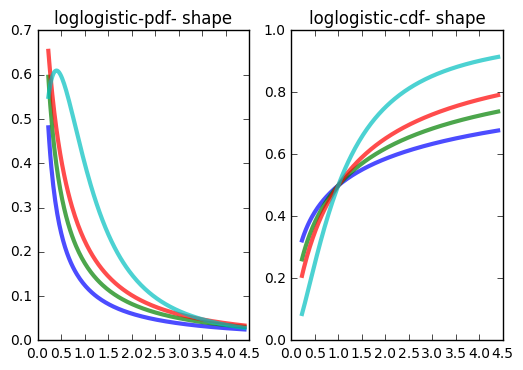

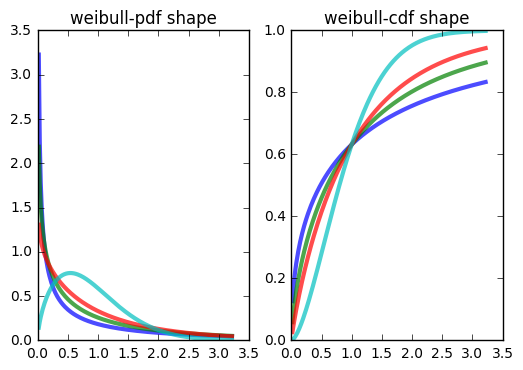

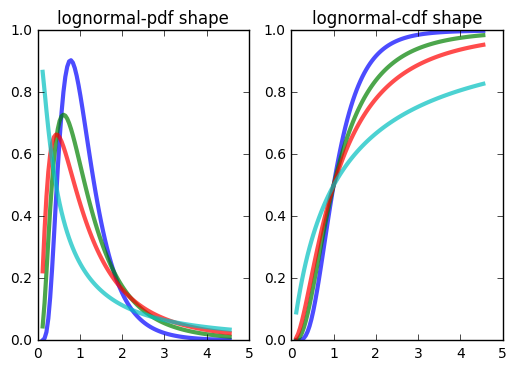

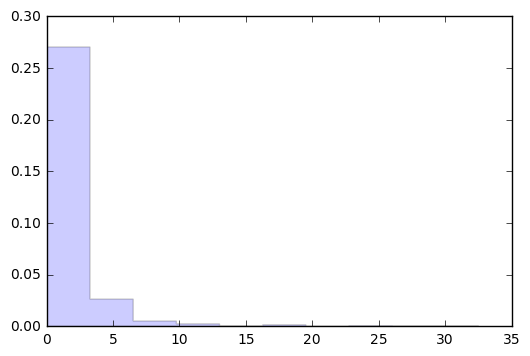

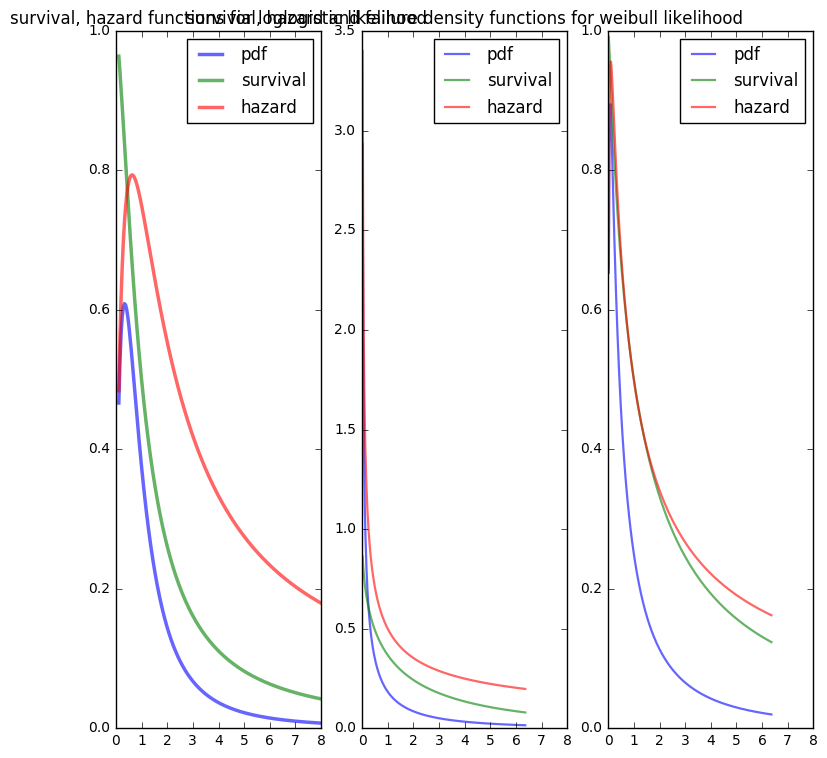

In [121]:
plt.show()
